In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
Student_df = pd.read_csv(r"C:\Users\DELL\Downloads\Student_Performance.csv")

In [252]:
Student_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [254]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [256]:
Student_df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [258]:
Student_df["Extracurricular Activities"].value_counts()


Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [260]:
Student_df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [262]:
Student_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [264]:
Student_df["Extracurricular Activities"] = Student_df["Extracurricular Activities"].map({'Yes': 1, 'No': 0})


In [266]:

# Exploratory Data Analysis
# Correlation 
numeric_df = Student_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

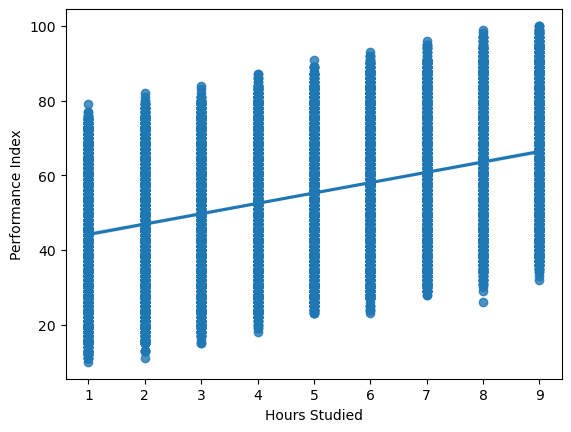

In [268]:
sns.regplot(data=Student_df, x="Hours Studied", y= "Performance Index")

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

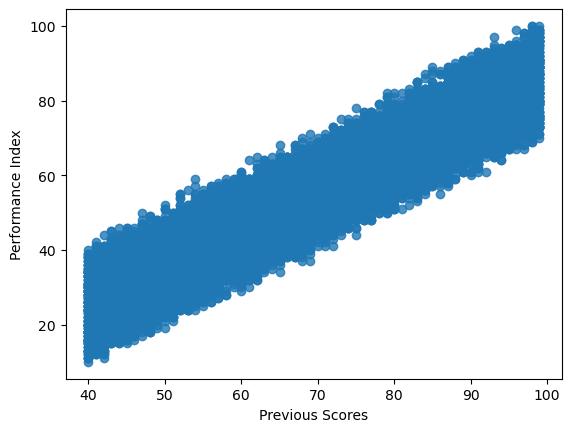

In [269]:
sns.regplot(data=Student_df, x="Previous Scores", y= "Performance Index")

In [270]:
# Independent and Dependent Features
X = Student_df.iloc[:,:-1]
Y = Student_df.iloc[:,-1]

In [271]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [273]:
Y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [278]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.3, random_state=42)

In [280]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9069,4,99,1,6,1
2603,6,90,1,9,3
7738,8,57,0,6,1
1579,6,92,1,8,7
5058,6,64,1,8,4
...,...,...,...,...,...
5734,8,50,1,6,6
5191,4,68,0,9,3
5390,9,48,0,7,6
860,1,47,0,9,0


In [282]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
8014,6,42,1,9,5
1074,2,60,0,7,7
3063,5,48,1,6,4
6487,3,86,1,9,5


In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [286]:
X_train= scaler.fit_transform(X_train)
X_train

array([[-0.37921729,  1.69543433,  1.01962103, -0.31944271, -1.26226064],
       [ 0.39110222,  1.17637842,  1.01962103,  1.44869036, -0.56482402],
       [ 1.16142173, -0.72682657, -0.98075655, -0.31944271, -1.26226064],
       ...,
       [ 1.54658149, -1.24588248, -0.98075655,  0.26993498,  0.4813309 ],
       [-1.53469656, -1.30355536, -0.98075655,  1.44869036, -1.61097894],
       [-1.1495368 , -1.36122824, -0.98075655, -0.31944271,  0.4813309 ]])

In [288]:
X_test= scaler.transform(X_test)
X_test

array([[ 0.00594246, -0.03475203, -0.98075655,  0.85931267, -0.91354233],
       [-1.1495368 , -1.36122824,  1.01962103, -1.49819809,  1.17876751],
       [ 0.77626198, -0.78449945,  1.01962103,  0.26993498,  0.13261259],
       ...,
       [ 0.00594246, -1.24588248,  1.01962103, -0.31944271, -0.21610572],
       [-0.76437705,  0.94568691,  1.01962103,  1.44869036,  0.13261259],
       [ 0.39110222, -1.53424687,  1.01962103, -0.31944271, -0.21610572]])

In [290]:
## Model Training
from sklearn.linear_model import LinearRegression

In [292]:
regression = LinearRegression()

In [294]:
regression.fit(X_train, Y_train)

LinearRegression()

In [296]:
## print the coefficients and the intercept
print(regression.coef_)

[ 7.42276987 17.60827303  0.29080153  0.8138699   0.54598268]


In [298]:
print(regression.intercept_)

55.39971428571428


In [328]:
## On which parameters the model has been trained 
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [330]:
#Prediction with test data
reg_pred= regression.predict(X_test)


In [332]:
reg_pred 

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

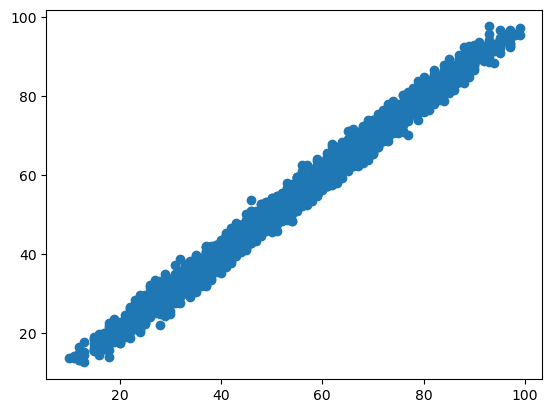

In [334]:
  plt.scatter(Y_test,reg_pred)

In [336]:
residuals= Y_test- reg_pred

In [338]:
residuals

6252   -3.747286
4684   -2.618844
1731   -1.936651
4742   -3.340099
4521   -2.059743
          ...   
8014    0.180225
1074    2.496955
3063   -0.424518
6487    1.074210
4705   -2.205871
Name: Performance Index, Length: 3000, dtype: float64

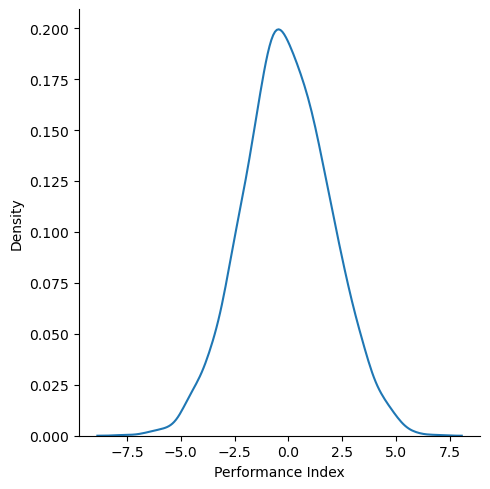

In [340]:
## Plotting the residuals 
sns.displot(residuals,kind="kde")

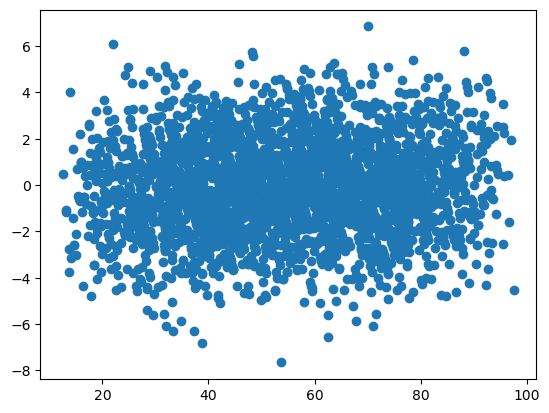

In [342]:
## Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred, residuals)

In [344]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test, reg_pred))
print(mean_squared_error(Y_test, reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

1.6090437564045224
4.066563824092683
2.016572295776346


## RSquare and Adjusted RSquare
from sklearn.metrics import r2_score
score= r2_score(Y_test,reg_pred)
print(score)

In [347]:
from sklearn.metrics import r2_score 
score= r2_score(Y_test,reg_pred) 
print(score)

0.9890110607021136


In [349]:
## Adjusted R square
1 - (1 -score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.9889927091000797

In [351]:
import pickle

pickle.dump(regression,open('regmodel.pkl','wb'))

In [354]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [372]:
#pickled_model.predict(scaler.transform(X_test[0].reshape(1,-1)))
#pickled_model.predict(scaler.transform(X_test.iloc[[0]]))
pickled_model.predict(scaler.transform(X_test[0].reshape(1, -1)))


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-34.38304372])

In [312]:
import numpy as np
X_augmented = X_test.copy()

# Add Gaussian noise with mean=0 and small std (e.g., 0.01)
noise = np.random.normal(0, 0.01, X_augmented.shape)
X_augmented_noisy = X_augmented + noise


In [316]:
X_augmented = X_test.copy()

# Add small Gaussian noise only to numeric columns
for col in X_augmented.columns:
    if X_augmented[col].dtype != 'object':
        std = X_augmented[col].std()
        noise = np.random.normal(0, 0.01 * std, size=X_augmented[col].shape)
        X_augmented[col] += noise


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [326]:
Student_df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [328]:
import pandas as pd

feature_names = [['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]  # replace with your actual names
X_test_df = pd.DataFrame(X_test, columns=feature_names)


In [336]:
X_augmented = X_test_df.copy()

for col in X_augmented.columns:
    if X_augmented[col].dtype != 'object':
        std = X_augmented[col].std()
        noise = np.random.normal(0, 0.01 * std, size=X_augmented[col].shape)
        X_augmented[col] += noise


In [364]:
X_augmented

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.011503,-0.036862,-0.996557,0.853769,-0.915450
1,-1.139814,-1.362739,1.015749,-1.498611,1.180752
2,0.786456,-0.776579,1.025928,0.266326,0.127265
3,0.390153,-1.591878,1.008604,0.873167,0.147440
4,0.776995,-0.961579,-0.977533,-1.500781,0.489639
...,...,...,...,...,...
1995,-1.145105,0.029502,-0.995510,0.271407,-0.564678
1996,-0.368416,0.558815,-0.978193,1.446329,-0.583144
1997,-1.151989,-1.699130,1.006573,0.282888,-0.919891
1998,-0.769051,0.766200,-0.984364,0.264926,0.122636


In [342]:
# Get the first row as a 2D array
sample = X_augmented.iloc[[0]]  # double brackets keep it 2D

# Transform and predict
prediction = pickled_model.predict(scaler.transform(sample))



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [360]:
# Assuming you have your feature names stored somewhere
feature_names =['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']  # or manually specify the list

# Convert your sample or batch back to DataFrame
X_sample_df = pd.DataFrame(sample, columns=feature_names)

# Then transform without warning
X_scaled = scaler.transform(X_sample_df)


In [362]:
samplerow = X_augmented.iloc[[0]]  # DataFrame with 1 row
X_scaled = scaler.transform(samplerow)  # no warning
prediction = pickled_model.predict(X_scaled)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [422]:
import numpy as np
import pandas as pd

# Ensure X_test is a DataFrame
if isinstance(X_test, np.ndarray):
    feature_names = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
                     'Sleep Hours', 'Sample Question Papers Practiced']
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Copy test dataset
X_modified = X_test.copy()

# Avoid extreme NaN generation
for col in X_modified.columns:
    if np.issubdtype(X_modified[col].dtype, np.number):  # Ensure it's numeric
        std_dev = X_modified[col].std()
        noise = np.random.uniform(-0.01 * std_dev, 0.01 * std_dev, X_modified[col].shape)  # Use uniform noise instead of Gaussian
        X_modified[col] = np.clip(X_modified[col] + noise, X_test[col].min(), X_test[col].max())  # Keep values within valid range

# Check for NaN values and replace with original data if needed
X_modified.fillna(X_test, inplace=True)

# Final test dataset with subtle variations
print(X_modified.head())

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
6252       4.979629        69.099270                    0.000467     8.008838   
4684       1.996342        46.040923                    0.995436     4.014951   
1731       7.011628        55.966093                    1.000000     6.997967   
4742       6.002184        42.023541                    1.000000     7.984404   
4521       6.980071        52.866151                    0.002583     4.011601   

      Sample Question Papers Practiced  
6252                          1.982699  
4684                          7.998272  
1731                          5.001788  
4742                          5.020939  
4521                          5.975712  


In [424]:
X_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     2000 non-null   float64
 1   Previous Scores                   2000 non-null   float64
 2   Extracurricular Activities        2000 non-null   float64
 3   Sleep Hours                       2000 non-null   float64
 4   Sample Question Papers Practiced  2000 non-null   float64
dtypes: float64(5)
memory usage: 93.8 KB


In [426]:
X_modified

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,4.979629,69.099270,0.000467,8.008838,1.982699
4684,1.996342,46.040923,0.995436,4.014951,7.998272
1731,7.011628,55.966093,1.000000,6.997967,5.001788
4742,6.002184,42.023541,1.000000,7.984404,5.020939
4521,6.980071,52.866151,0.002583,4.011601,5.975712
...,...,...,...,...,...
6412,2.006448,70.143972,0.002860,6.988115,3.006320
8285,3.996176,78.872897,0.000190,8.988305,3.012916
7853,2.012439,40.000000,0.999730,7.013655,1.994904
1095,2.976888,82.852052,0.000000,6.992820,5.012992


In [420]:
X_modified.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.031344,69.104165,0.495527,6.486505,4.450455
std,2.564821,17.339306,0.498895,1.683081,2.886539
min,1.000000,40.000000,0.000000,4.000000,0.000000
25%,2.993270,54.038330,0.000000,5.000049,1.994724
50%,5.003564,68.122803,0.004906,6.984238,4.024128
75%,7.012155,83.998089,0.999926,7.997437,6.999615
max,9.000000,99.000000,1.000000,9.000000,9.000000
